Bolded text = **do not change**

Italics text = *replace with your own words*


******************
*******************

# **Description of data and plans for analysis**

 


My dataset contains play-by-play data for the Los Angeles Chargers during the 2020 NFL season. The dataset only contains designed run plays for the team, so it excludes all defensive, special teams, passing, and non-designed run plays (i.e. quarterback scrambles). Within this dataset are numerous variables that provide information about a given run play, but I will focus on three of these variables when conducting my analysis. The three main variables that I chose to focus on are "Yards," which takes the value of the amount of yards gained on the play, "RushDirection," which assigns the run play to one of seven directions, and "Formation," which provides information on the general offensive alignment for that play. Prior to conducting any analysis, some feature engineering must be done. This will include removing all plays where a penalty occurred, cleaning the dataset by removing variables that are not relevant to the analysis, creating dummy variables for the "RushDirection" and "Formation" variables, and removing outliers in the "Yards" variable. Using these dummy-coded variables, I will first run a linear regression that predicts the amount of yards gained based on the rush direction. Then, I will run a multi-variate linear regression to predict the amount of yards gained on a play by using both pre-snap formation and rush direction as the independent variables.

*******************
*******************
# **Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import model_selection
from sklearn.preprocessing import PolynomialFeatures

*******************
*******************
# **Functions used in notebook**

1. kfold_crossval_linear: A function that uses kfold cross-validation to estimate the fit of a linear regression model

2. kfold_crossval_poly: A function that uses kfold cross-validation to estimate the fit of a polynomial regression model

3. multivariate_linear_regression: A function that uses linear regression to find the relationship between your independent variables and dependent variables

In [3]:
def kfold_crossval_linear(X, y):
  """
  a function that uses kfold cross-validation to estimate the fit of a linear regression model

  Inputs:
  X = your predictor (indpendent) variable(s) 
  y = the variable you want to predict (dependent variable)

  Outputs:
  Training R^2
  Testing R^2
  Residual Plot
  """

  # Select a kfold model with 5 splits
  kfold = model_selection.KFold(n_splits = 5)

  # Define model as linear regression
  model = LinearRegression()

  # Cross validate the model on the data to find the training and testing R^2 values
  results = model_selection.cross_validate(model, X, y, scoring = "r2", cv = kfold, return_train_score=True)

  # Print the average training and testing R^2 values
  print("Average Training R^2:", results["train_score"].mean())
  print("Average Testing R^2:", results["test_score"].mean())
  print()

  # Find the predicted y-values to create residual plot
  y_predicted = model_selection.cross_val_predict(model, X, y, cv = kfold)

  # Show residual plot
  sns.scatterplot(x = y_predicted, y = y_predicted - y)
  plt.xlabel("Residuals")

In [4]:
def kfold_crossval_poly(X, y, features):
  """
  a function that uses kfold cross-validation to estimate the fit of a polynomial regression model

  Inputs:
  X = your predictor (indpendent) variable(s) 
  y = the variable you want to predict (dependent variable)
  features = number of polynomial features you want to use

  Outputs:
  Training R^2
  Testing R^2
  Residual Plot
  """

  # Create the polynomial object
  p = PolynomialFeatures(features)

  # Get the tranformed features
  X_p = p.fit_transform(X)

  # Select a kfold model with 5 splits
  kfold = model_selection.KFold(n_splits = 5)

  # Define model as linear regression
  model = LinearRegression()

  # Cross validate the model on the data to find the training and testing R^2 values
  results = model_selection.cross_validate(model, X_p, y, scoring = "r2", cv = kfold, return_train_score=True)

  # Print the average training and testing R^2 values
  print("Average Training R^2:", results["train_score"].mean())
  print("Average Testing R^2:", results["test_score"].mean())
  print()

  # Find the predicted y-values to create residual plot
  y_predicted = model_selection.cross_val_predict(model, X_p, y, cv = kfold)

  # Show residual plot
  sns.scatterplot(x = y_predicted, y = y_predicted - y)
  plt.xlabel("Residuals")

In [5]:
def multivariate_linear_regression(X, y):
  """
  a function that uses linear regression to find the relationship between your independent variables and dependent variables

  Inputs:
  X = your predictor (indpendent) variables 
  y = the variable you want to predict (dependent variable)

  Outputs:
  Training R^2
  Testing R^2
  Equation of your linear regression line
  Subplots displaying the relationships of your independent variables on your dependent variable
  """

  # Split data into training X and y and testing X and y
  Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state = 217)

  # Define model as linear regression
  model = LinearRegression(fit_intercept = True)

  # Fit model to the training data
  model.fit(Xtrain, ytrain)

  # Print the training and testing R^2 values
  print("Training R^2:", model.score(Xtrain, ytrain))
  print("Testing R^2:", model.score(Xtest, ytest))
  print()
  
  # Find the predicted y values using model.predict()
  y_predicted = model.predict(Xtest)

  ###### Create subplots and regression equation #######

  # Set axes (number of independent dummy variables [9] by 1) and figure size
  fig, axes = plt.subplots(Xtrain.shape[1], 1, figsize=[8, 20])
  
  # Initialize a string that will be used to create the linear regression equation by looping through the columns in Xtest
  string = ""

  # Create a for loop that iterates over the columns in Xtrain
  for i in range(Xtrain.shape[1]):

    # Create a scatterplot that has the dummy coded variable values (0 or 1) in Xtest on the x axis and the value of y test on the y axis
    sns.scatterplot(x = Xtest[Xtest.columns[i]], y = ytest, ax = axes[i])
    # Add the regression line
    sns.lineplot(x = Xtest[Xtest.columns[i]], y = y_predicted, ax = axes[i])

    # Loop through each Xtest column to create strings representing the beta values and add the string to the previous iteration
    string = string + "" + str(np.round(model.coef_[i], 4))+ "*" + Xtest.columns[i] + " + "

  # Print the multivariate linear regression equation
  print("y =", string, "", np.round(model.intercept_, 4))
  print()

  plt.tight_layout()

*******************
*******************
# **Getting data**

1. Load in csv data
2. Remove rows that are all NA
3. Display first 5 rows of the data
4. Display last 5 rows of the data
5. Show the columns and their corresponding number of null values and data type using data.info()
6. Show descriptive statistics for each quantitative variable using data.describe()
7. Show descriptive statistcs for the three variables of interest: "Yards", "RushDirection", and "Formation"

In [4]:
# Load in data
data = pd.read_csv("pbp-2020-final.csv")

In [5]:
# Remove rows that are all NA
data = data.dropna(how = "all")

In [6]:
# Display first 5 rows of data
data.head()

,GameId,GameDate,Quarter,Minute,Second,OffenseTeam,DefenseTeam,Down,ToGo,YardLine,SeriesFirstDown,NextScore,Description,TeamWin,SeasonYear,Yards,Formation,PlayType,IsRush,IsPass,IsIncomplete,IsTouchdown,PassType,IsSack,IsChallenge,IsChallengeReversed,Challenger,IsMeasurement,IsInterception,IsFumble,IsPenalty,IsTwoPointConversion,IsTwoPointConversionSuccessful,RushDirection,YardLineFixed,YardLineDirection,IsPenaltyAccepted,PenaltyTeam,IsNoPlay,PenaltyType,PenaltyYards
0,2.021010e+09,1/3/2021,3.0,1.0,38.0,LAC,KC,1.0,10.0,51.0,0.0,0.0,(1:38) (SHOTGUN) 31-K.BALLAGE RIGHT END TO KC ...,0.0,2020.0,1.0,SHOTGUN,RUSH,1.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,RIGHT END,49.0,OPP,0.0,NaN,0.0,NaN,0.0
1,2.021010e+09,1/3/2021,3.0,13.0,1.0,LAC,KC,2.0,10.0,53.0,0.0,0.0,(13:01) (SHOTGUN) 31-K.BALLAGE RIGHT END TO KC...,0.0,2020.0,8.0,SHOTGUN,RUSH,1.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,1.0,0.0,0.0,RIGHT END,47.0,OPP,1.0,LAC,0.0,OFFENSIVE HOLDING,10.0
2,2.020121e+09,12/13/2020,1.0,9.0,34.0,LAC,ATL,2.0,2.0,56.0,1.0,0.0,(9:34) 30-A.EKELER UP THE MIDDLE TO ATL 31 FOR...,0.0,2020.0,13.0,UNDER CENTER,RUSH,1.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,CENTER,44.0,OPP,0.0,NaN,0.0,NaN,0.0
3,2.020121e+09,12/13/2020,1.0,8.0,52.0,LAC,ATL,1.0,10.0,69.0,0.0,0.0,(8:52) 31-K.BALLAGE UP THE MIDDLE TO ATL 34 FO...,0.0,2020.0,-3.0,UNDER CENTER,RUSH,1.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,0.0,1.0,0.0,0.0,0.0,CENTER,31.0,OPP,0.0,NaN,0.0,NaN,0.0
4,2.020122e+09,12/17/2020,3.0,13.0,38.0,LAC,LV,3.0,1.0,62.0,0.0,0.0,(13:38) (SHOTGUN) 31-K.BALLAGE UP THE MIDDLE T...,0.0,2020.0,-4.0,SHOTGUN,RUSH,1.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,CENTER,38.0,OPP,0.0,NaN,0.0,NaN,0.0


In [7]:
# Display last 5 rows of data
data.tail()

,GameId,GameDate,Quarter,Minute,Second,OffenseTeam,DefenseTeam,Down,ToGo,YardLine,SeriesFirstDown,NextScore,Description,TeamWin,SeasonYear,Yards,Formation,PlayType,IsRush,IsPass,IsIncomplete,IsTouchdown,PassType,IsSack,IsChallenge,IsChallengeReversed,Challenger,IsMeasurement,IsInterception,IsFumble,IsPenalty,IsTwoPointConversion,IsTwoPointConversionSuccessful,RushDirection,YardLineFixed,YardLineDirection,IsPenaltyAccepted,PenaltyTeam,IsNoPlay,PenaltyType,PenaltyYards
425,2.020091e+09,9/13/2020,2.0,8.0,5.0,LAC,CIN,2.0,19.0,81.0,0.0,0.0,(8:05) (SHOTGUN) 30-A.EKELER LEFT TACKLE TO CI...,0.0,2020.0,13.0,SHOTGUN,RUSH,1.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,LEFT TACKLE,19.0,OPP,0.0,NaN,0.0,NaN,0.0
426,2.020091e+09,9/13/2020,2.0,9.0,25.0,LAC,CIN,1.0,10.0,44.0,0.0,0.0,(9:25) (SHOTGUN) 30-A.EKELER RIGHT END TO LAC ...,0.0,2020.0,1.0,SHOTGUN,RUSH,1.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,RIGHT END,44.0,OWN,0.0,NaN,0.0,NaN,0.0
427,2.020091e+09,9/13/2020,2.0,11.0,18.0,LAC,CIN,1.0,10.0,20.0,1.0,0.0,(11:18) (SHOTGUN) 30-A.EKELER LEFT END PUSHED ...,0.0,2020.0,13.0,SHOTGUN,RUSH,1.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,LEFT END,20.0,OWN,0.0,NaN,0.0,NaN,0.0
428,2.020091e+09,9/13/2020,1.0,12.0,32.0,LAC,CIN,1.0,10.0,34.0,0.0,0.0,(12:32) (SHOTGUN) 30-A.EKELER UP THE MIDDLE TO...,0.0,2020.0,3.0,SHOTGUN,RUSH,1.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,CENTER,34.0,OWN,0.0,NaN,0.0,NaN,0.0
429,2.020091e+09,9/13/2020,1.0,13.0,37.0,LAC,CIN,2.0,10.0,20.0,0.0,0.0,(13:37) (SHOTGUN) 30-A.EKELER UP THE MIDDLE TO...,0.0,2020.0,4.0,SHOTGUN,RUSH,1.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,CENTER,20.0,OWN,0.0,NaN,0.0,NaN,0.0


In [8]:
# Show data.info
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 430 entries, 0 to 429
Data columns (total 41 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   GameId                          430 non-null    float64
 1   GameDate                        430 non-null    object 
 2   Quarter                         430 non-null    float64
 3   Minute                          430 non-null    float64
 4   Second                          430 non-null    float64
 5   OffenseTeam                     430 non-null    object 
 6   DefenseTeam                     430 non-null    object 
 7   Down                            430 non-null    float64
 8   ToGo                            430 non-null    float64
 9   YardLine                        430 non-null    float64
 10  SeriesFirstDown                 430 non-null    float64
 11  NextScore                       430 non-null    float64
 12  Description                     430 

In [9]:
# Show descriptive statistics
data.describe()

,GameId,Quarter,Minute,Second,Down,ToGo,YardLine,SeriesFirstDown,NextScore,TeamWin,SeasonYear,Yards,IsRush,IsPass,IsIncomplete,IsTouchdown,PassType,IsSack,IsChallenge,IsChallengeReversed,Challenger,IsMeasurement,IsInterception,IsFumble,IsPenalty,IsTwoPointConversion,IsTwoPointConversionSuccessful,YardLineFixed,IsPenaltyAccepted,IsNoPlay,PenaltyYards
count,4.300000e+02,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.0,430.0,430.0,430.000000,430.0,430.0,430.0,430.000000,0.0,430.0,430.0,430.0,0.0,430.0,430.0,430.000000,430.000000,430.0,430.0,430.000000,430.000000,430.000000,430.000000
mean,2.020172e+09,2.544186,6.923256,28.265116,1.553488,7.837209,52.772093,0.232558,0.0,0.0,2020.0,3.930233,1.0,0.0,0.0,0.025581,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.013953,0.027907,0.0,0.0,27.846512,0.025581,0.013953,0.246512
std,2.341193e+05,1.153348,4.436148,17.978216,0.754582,4.119034,25.621490,0.422955,0.0,0.0,0.0,5.312146,0.0,0.0,0.0,0.158067,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.117434,0.164898,0.0,0.0,13.124105,0.158067,0.117434,1.706883
min,2.020091e+09,1.000000,0.000000,0.000000,1.000000,1.000000,3.000000,0.000000,0.0,0.0,2020.0,-5.000000,1.0,0.0,0.0,0.000000,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
25%,2.020100e+09,2.000000,3.000000,13.000000,1.000000,5.000000,31.000000,0.000000,0.0,0.0,2020.0,1.000000,1.0,0.0,0.0,0.000000,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.000000,0.000000,0.0,0.0,20.000000,0.000000,0.000000,0.000000
50%,2.020111e+09,3.000000,7.000000,28.000000,1.000000,10.000000,48.500000,0.000000,0.0,0.0,2020.0,3.000000,1.0,0.0,0.0,0.000000,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.000000,0.000000,0.0,0.0,29.000000,0.000000,0.000000,0.000000
75%,2.020121e+09,4.000000,11.000000,43.000000,2.000000,10.000000,74.000000,0.000000,0.0,0.0,2020.0,5.000000,1.0,0.0,0.0,0.000000,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.000000,0.000000,0.0,0.0,38.000000,0.000000,0.000000,0.000000
max,2.021010e+09,5.000000,15.000000,59.000000,4.000000,28.000000,100.000000,1.000000,0.0,0.0,2020.0,36.000000,1.0,0.0,0.0,1.000000,NaN,0.0,0.0,0.0,NaN,0.0,0.0,1.000000,1.000000,0.0,0.0,49.000000,1.000000,1.000000,15.000000


In [10]:
# Show descriptive statistics for "Yards"
print("Descriptive statistics for yards:")
print(data["Yards"].describe())
print()

# Show the counts for "RushDirection"
print("Value counts for rush direction:")
print(data["RushDirection"].value_counts())
print()

# Show the counts for "Formation"
print("Value counts for pre-snap formation:")
print(data["Formation"].value_counts())

Descriptive statistics for yards:
count    430.000000
mean       3.930233
std        5.312146
min       -5.000000
25%        1.000000
50%        3.000000
75%        5.000000
max       36.000000
Name: Yards, dtype: float64

Value counts for rush direction:
CENTER          137
RIGHT END        61
LEFT TACKLE      49
RIGHT GUARD      49
LEFT END         49
LEFT GUARD       45
RIGHT TACKLE     40
Name: RushDirection, dtype: int64

Value counts for pre-snap formation:
UNDER CENTER         218
SHOTGUN              192
NO HUDDLE             15
NO HUDDLE SHOTGUN      5
Name: Formation, dtype: int64


***************
***************
# **Visualizing data**

1. Histogram of yards gained (to show how "Yards" variable is distributed)
2. Boxplot of yards gained by rush direction (to show how yards gained varies by rush direction)
3. Violinplot of yards gained by pre-snap formation (to show how yards gained varies by pre-snap formation)
4. Kernel Density Estimation Plot of yards gained by formation (to show how yards vary by rush direction again, as well as the variance in how prevalent each rush direction was)
5. Catplot displaying distribution of yardage by rush direction, with formation as color
6. Grid of scatterplots showing the distribution of yardage gained within each possible combination of rush direction and formation

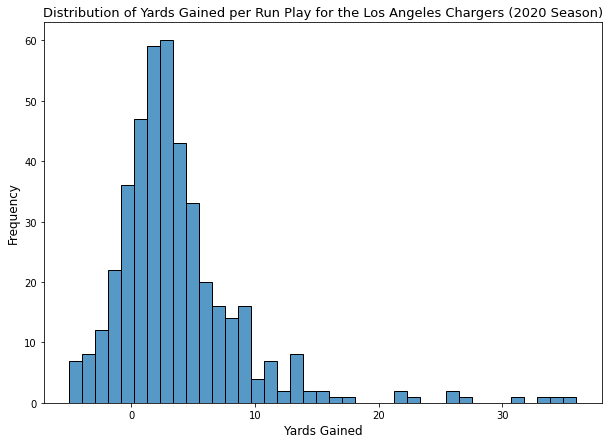

In [81]:
# visualization 1 - Histogram of yards gained
plt.figure(figsize = [10, 7])
sns.histplot(x = data["Yards"], data = data)
plt.xlabel("Yards Gained", fontsize = 12)
plt.ylabel("Frequency", fontsize = 12)
plt.title("Distribution of Yards Gained per Run Play for the Los Angeles Chargers (2020 Season)", fontsize = 13)
plt.show()

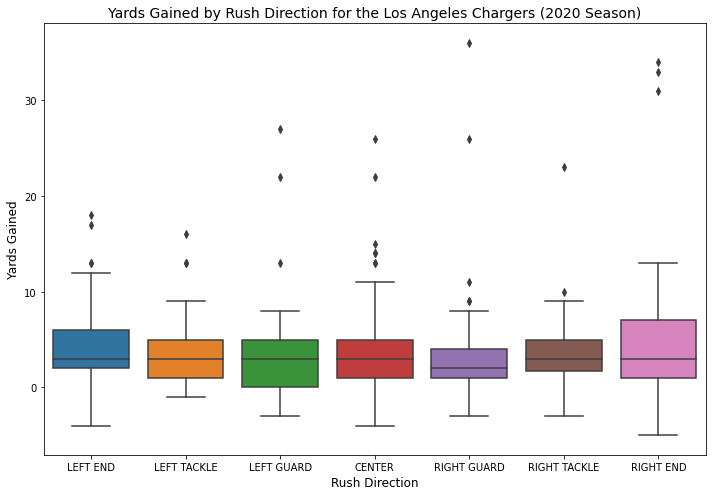

In [79]:
# visualization 2 - Boxplot of yards gained by rush direction
plt.figure(figsize = [10, 7])
sns.boxplot(x = data["RushDirection"], y = data["Yards"], data = data, order = ["LEFT END", "LEFT TACKLE", "LEFT GUARD", "CENTER", "RIGHT GUARD", "RIGHT TACKLE", "RIGHT END"])
sns.color_palette("hls", 8)
plt.xlabel("Rush Direction", fontsize = 12)
plt.ylabel("Yards Gained", fontsize = 12)
plt.title("Yards Gained by Rush Direction for the Los Angeles Chargers (2020 Season)", fontsize = 14)
plt.tight_layout()

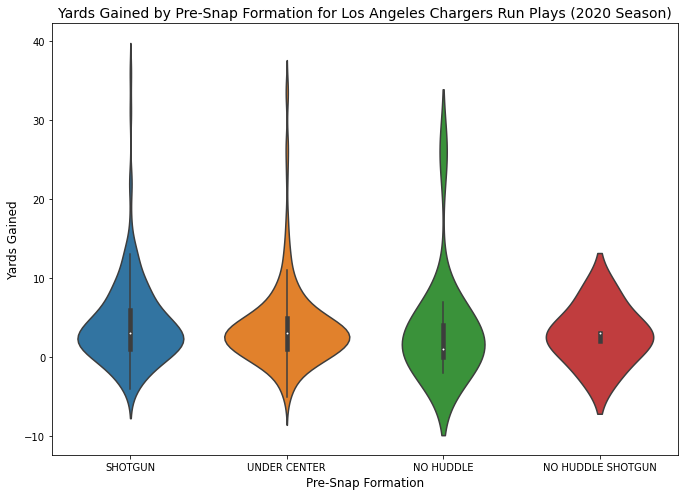

In [96]:
# visualization 3 - Violinplot of yards gained by pre-snap formation
plt.figure(figsize = [10, 7])
sns.violinplot(x = data["Formation"], y = data["Yards"], data = data)
plt.xlabel("Pre-Snap Formation", fontsize = 12)
plt.ylabel("Yards Gained", fontsize = 12)
plt.title("Yards Gained by Pre-Snap Formation for Los Angeles Chargers Run Plays (2020 Season)", fontsize = 14)
plt.tight_layout()

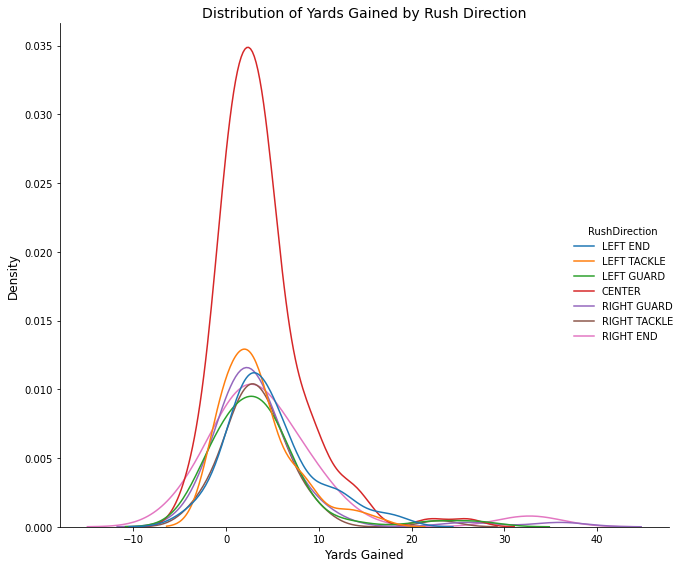

In [100]:
# Visualization 4 - Kernel Density Estimation Plot of yards gained by formation
sns.displot(x = data["Yards"], hue = data["RushDirection"], kind = "kde", height = 8,
            hue_order = ["LEFT END", "LEFT TACKLE", "LEFT GUARD", "CENTER", "RIGHT GUARD", "RIGHT TACKLE", "RIGHT END"])
plt.xlabel("Yards Gained", fontsize = 12)
plt.ylabel("Density", fontsize = 12)
plt.title("Distribution of Yards Gained by Rush Direction", fontsize = 14)
plt.tight_layout()

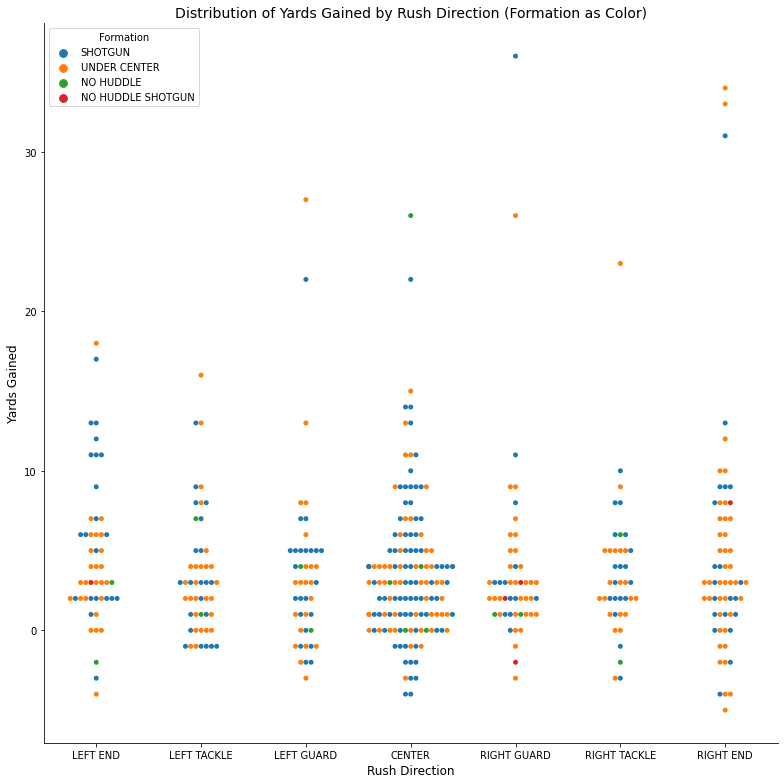

In [14]:
# Visualization 5 - Catplot displaying distribution of yardage by rush direction, with formation as color
sns.catplot(y = "Yards", x = "RushDirection", hue = "Formation", kind = "swarm", height = 11, legend_out = False, 
            order = ["LEFT END", "LEFT TACKLE", "LEFT GUARD", "CENTER", "RIGHT GUARD", "RIGHT TACKLE", "RIGHT END"], data = data)
plt.xlabel("Rush Direction", fontsize = 12)
plt.ylabel("Yards Gained", fontsize = 12)
plt.title("Distribution of Yards Gained by Rush Direction (Formation as Color)", fontsize = 14)
# Add legend to top left corner
plt.legend(loc = "upper left", title = "Formation")
plt.tight_layout()

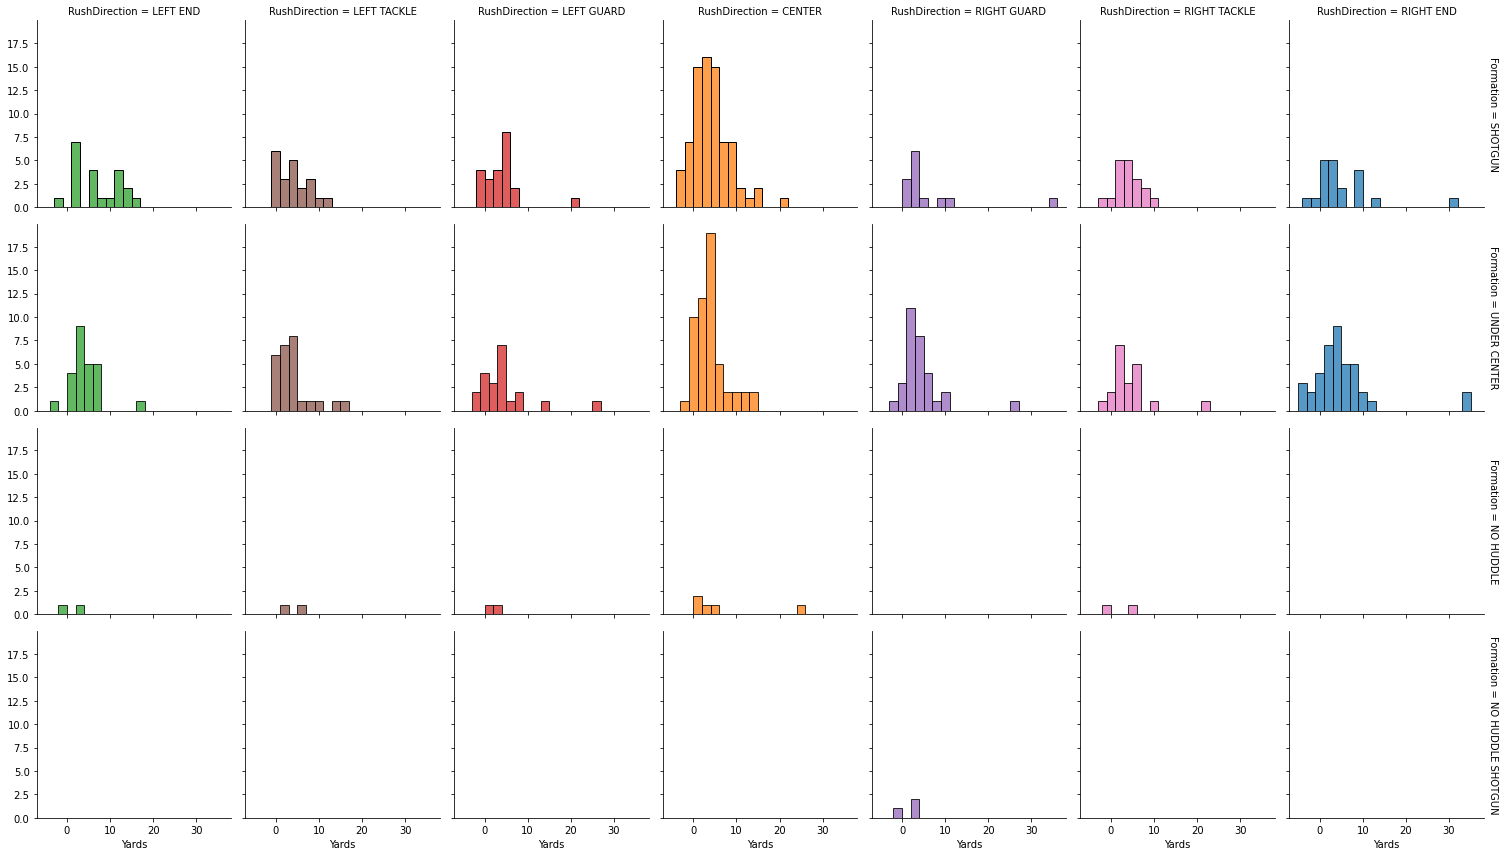

In [16]:
# Visualization 6 - Histogram grid of yards gained by combination of formation and rush direction
grid = sns.FacetGrid(data, col = "RushDirection", margin_titles = True, row = "Formation", hue = "RushDirection",
                     col_order = ["LEFT END", "LEFT TACKLE", "LEFT GUARD", "CENTER", "RIGHT GUARD", "RIGHT TACKLE", "RIGHT END"])
grid.map(sns.histplot, "Yards", binwidth = 2)
plt.tight_layout()

***************
***************
# **Feature Engineering**

1. Remove plays where a penalty occurred ("IsPenalty" == 1)

2. Check for and take care of any null values 
 * Plot a heatmap showing where missing data is present in the dataframe 
 * Take care of any missing values if they may affect the analysis

3. Look for duplicates within the dataframe
 * Remove duplicate values if they exist

4. Clean the dataframe by removing any columns that will not be relevant to the analysis
 * Only need "Yards", "RushDirection", and "Formation"
 * Show updated head of the data

5. Dummy code the "RushDirection" and "Formation" variables, and remove the categorical columns for these variables
 * Use pd.get_dummies() for both categorical variables to create two dataframes with the new dummy variables
 * Concatenate the dummy variables to the main dataframe
 * Remove the pre-existing categorical variables
 * Show updated head of the data

6. Remove outliers for the "Yards" variable
 * Check for outliers using IQR method
 *  Print the number of outliers, the row numbers and corresponding values of the outliers, and the length of the dataframe with outliers
 * Remove outliers from the dataset and print the updated maximum and length of the dataset

In [13]:
# Remove plays where a penalty occurred because the penalty may have affected the result of the play
data = data[data["IsPenalty"] == 0]

Heatplot displaying where the missing data is located:


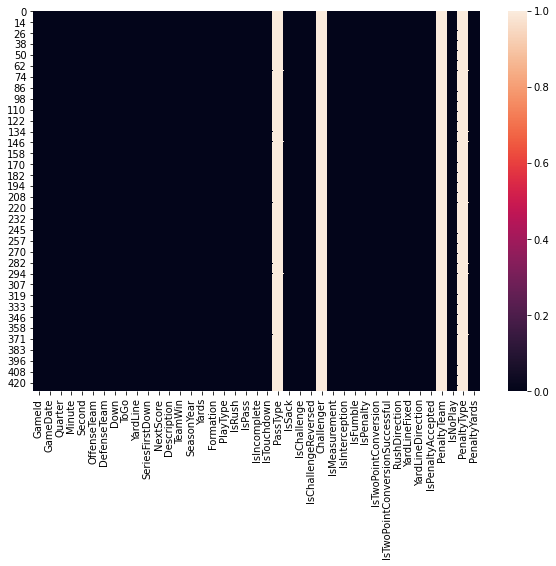


There are no null values for the variables we will be using (RushDirection, Formation, Yards)


In [14]:
# Check and take care of null values
print("Heatplot displaying where the missing data is located:")
plt.figure(figsize = [10, 7])
sns.heatmap(data.isnull())
plt.show()
print()

print("There are no null values for the variables we will be using (RushDirection, Formation, Yards)")

In [15]:
# Show whether or not there are duplicates
duplicates = data.duplicated().any()

if duplicates == True:
  print("There are duplicates in the dataframe.")
else:
  print("There are no duplicates in the dataframe.")

There are no duplicates in the dataframe.


In [16]:
# Remove columns that are not necessary for this analysis
data = data[["Yards", "RushDirection", "Formation"]]

# Show head of updated dataframe
data.head()

,Yards,RushDirection,Formation
0,1.0,RIGHT END,SHOTGUN
2,13.0,CENTER,UNDER CENTER
3,-3.0,CENTER,UNDER CENTER
4,-4.0,CENTER,SHOTGUN
5,5.0,RIGHT END,UNDER CENTER


In [17]:
# Check and take care of string values

# List the variables you will be dummy coding
print("Variables to be dummy coded: RushDirection, Formation")
print()

# Dummy code these variables
direction_df = pd.get_dummies(data["RushDirection"], drop_first = True)
formation_df = pd.get_dummies(data["Formation"], drop_first = True)

# Add dummy coded variables to dataframe
data = pd.concat([data, direction_df, formation_df], axis = 1)

# Drop non-dummy coded categorical variables
data = data.drop(columns = ["RushDirection", "Formation"])

# Show head of updated dataframe
data.head()

Variables to be dummy coded: RushDirection, Formation



,Yards,LEFT END,LEFT GUARD,LEFT TACKLE,RIGHT END,RIGHT GUARD,RIGHT TACKLE,NO HUDDLE SHOTGUN,SHOTGUN,UNDER CENTER
0,1.0,0,0,0,1,0,0,0,1,0
2,13.0,0,0,0,0,0,0,0,0,1
3,-3.0,0,0,0,0,0,0,0,0,1
4,-4.0,0,0,0,0,0,0,0,1,0
5,5.0,0,0,0,1,0,0,0,0,1


In [18]:
# Check outliers for "Yards" using IQR method

# Find Q1, Q3, and the IQR
Q1 = data["Yards"].quantile(.25)
Q3 = data["Yards"].quantile(.75)
IQR = Q3 - Q1

# Find all outliers at least 1.5*IQR above Q3
over_outliers = data[data["Yards"] > (Q3 + (IQR * 1.5))]
# Find all outliers at least 1.5*IQR below Q1
under_outliers = data[data["Yards"] < (Q1 - (IQR * 1.5))]

# Print the number of outliers present in the "Yards" variable
print("There are", len(over_outliers) + len(under_outliers), "outliers values for the 'Yards' variable:")
# Print the row number and "Yards" values of the outliers
print(over_outliers["Yards"], under_outliers["Yards"])
print()

# Print the length of the dataframe with outliers
print("Length of dataframe with outliers:", len(data))
print()

# Remove outliers for "Yards" from the dataset
data = data[data["Yards"] <= (Q3 + (IQR * 1.5))]
data = data[data["Yards"] >= (Q1 - (IQR * 1.5))]

# Show updated maximum
print("Maximum yards gained after removing outliers:")
print(data["Yards"].max())
print()

# Print the length of the dataframe after removing outliers
print("Length of dataframe after removing outliers:", len(data))

There are 26 outliers values for the 'Yards' variable:
2      13.0
12     12.0
29     13.0
33     33.0
62     18.0
79     12.0
110    26.0
117    13.0
130    36.0
143    31.0
154    22.0
172    17.0
180    15.0
203    27.0
212    34.0
240    23.0
263    13.0
276    13.0
295    14.0
312    26.0
318    14.0
322    22.0
356    13.0
391    16.0
425    13.0
427    13.0
Name: Yards, dtype: float64 Series([], Name: Yards, dtype: float64)

Length of dataframe with outliers: 418

Maximum yards gained after removing outliers:
11.0

Length of dataframe after removing outliers: 392


***************
***************
# **Analysis section**

Before conducting a regression, I will use kfold cross-validation to estimate the performance of both a linear regression model and a polynomial regression model to evaluate the performance of each model on the training and testing datasets. Since linear regression seems to perform slightly better (as indicated by the higher R^2 scores), I will proceed with the rest of my analysis using linear regression.

In my first linear regression, I will use the previously defined multivariate_linear_regression function to make predictions about the amount of yardage that would be gained on a given play using only direction of the run. This function will allow us to calculate the training and testing R^2 values, the equation of the regression line, and plot the regression lines on their corresponding subplots.

Finally, I will use this function to make predictions about the amount of yaradge gained on a given play using both direction of the run and pre-snap formation.

Average Training R^2: 0.012557575372666751
Average Testing R^2: -0.04389301610348717



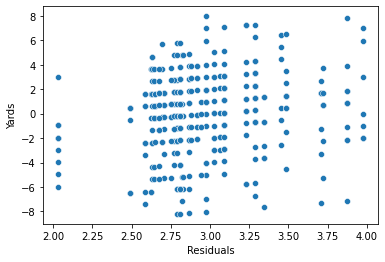

In [55]:
kfold_crossval_linear(data[["LEFT END", "RIGHT END", "RIGHT GUARD", "LEFT GUARD", "RIGHT TACKLE", "LEFT TACKLE"]], data["Yards"])

Average Training R^2: 0.0005145029581334227
Average Testing R^2: -0.05597367934343005



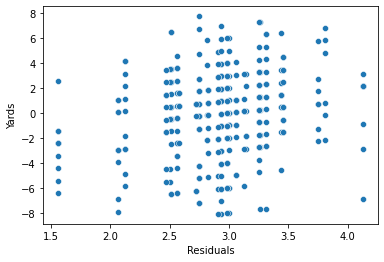

In [53]:
kfold_crossval_poly(data[["LEFT END", "RIGHT END", "RIGHT GUARD", "LEFT GUARD", "RIGHT TACKLE", "LEFT TACKLE"]], data["Yards"], 7)

Average Training R^2: 0.022240563704394044
Average Testing R^2: -0.05892115147364221



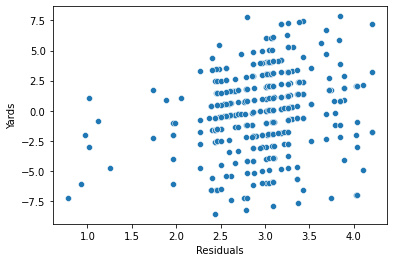

In [54]:
kfold_crossval_linear(data[["LEFT END", "RIGHT END", "RIGHT GUARD", "LEFT GUARD", "RIGHT TACKLE", "LEFT TACKLE", "SHOTGUN", "NO HUDDLE SHOTGUN", "UNDER CENTER"]], data["Yards"])

Average Training R^2: 0.007745765571060015
Average Testing R^2: -6.866553649206726e+25



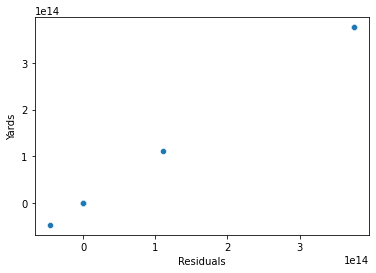

In [64]:
kfold_crossval_poly(data[["LEFT END", "RIGHT END", "RIGHT GUARD", "LEFT GUARD", "RIGHT TACKLE", "LEFT TACKLE", "SHOTGUN", "NO HUDDLE SHOTGUN", "UNDER CENTER"]], data["Yards"], 7)

Training R^2: 0.00680674695454675
Testing R^2: -0.0020110777594262164

y = 0.4149*LEFT END + -0.4487*RIGHT END + -0.1733*RIGHT GUARD + -0.2851*LEFT GUARD + 0.2482*RIGHT TACKLE + -0.291*LEFT TACKLE +   3.0851



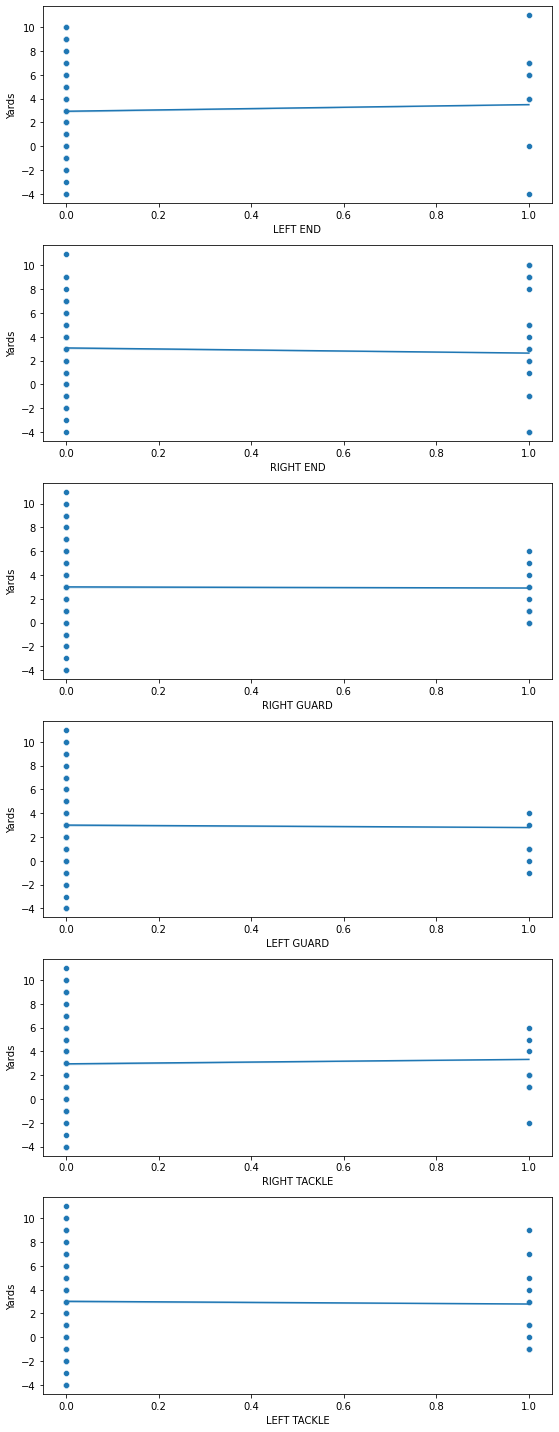

In [19]:
multivariate_linear_regression(data[["LEFT END", "RIGHT END", "RIGHT GUARD", "LEFT GUARD", "RIGHT TACKLE", "LEFT TACKLE"]], data["Yards"])

Training R^2: 0.008559812112125309
Testing R^2: 0.010699585545251966

y = 0.4634*LEFT END + -0.3944*RIGHT END + -0.0922*RIGHT GUARD + -0.2724*LEFT GUARD + 0.2828*RIGHT TACKLE + -0.2357*LEFT TACKLE + 0.3828*SHOTGUN + 0.2077*NO HUDDLE SHOTGUN + 0.119*UNDER CENTER +   2.8212



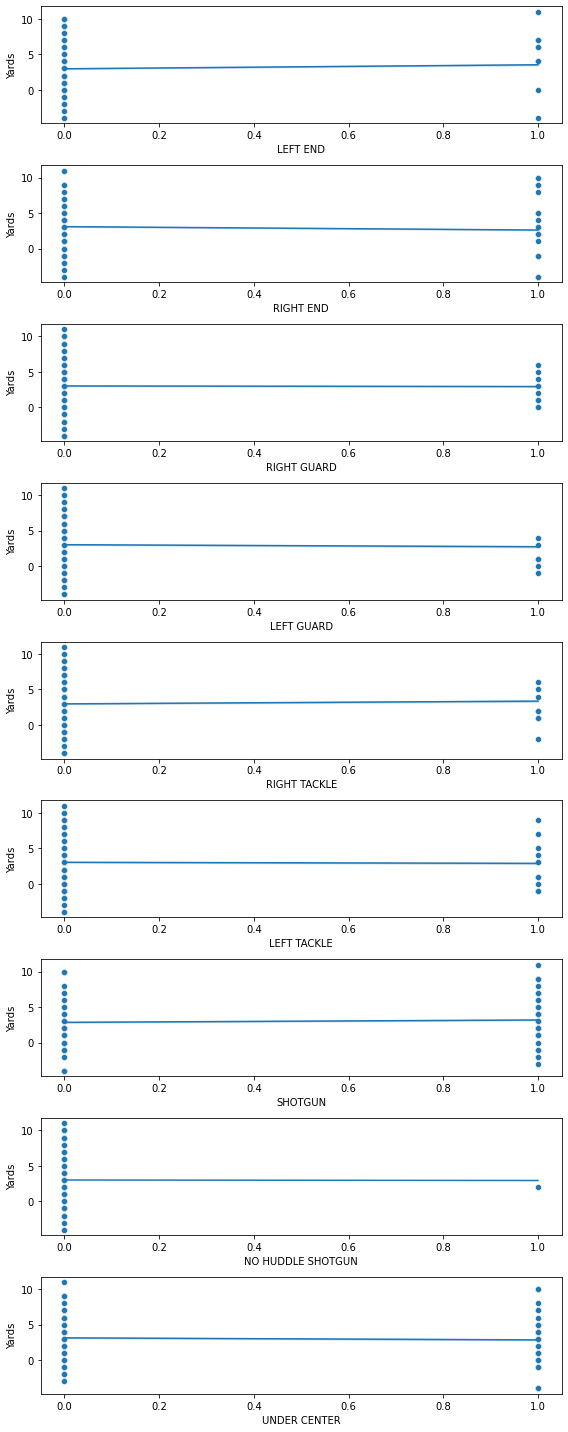

In [20]:
multivariate_linear_regression(data[["LEFT END", "RIGHT END", "RIGHT GUARD", "LEFT GUARD", "RIGHT TACKLE", "LEFT TACKLE", "SHOTGUN", "NO HUDDLE SHOTGUN", "UNDER CENTER"]], data["Yards"])

***************
***************
# **Conclusions**

The results of my analysis indicate that there is not a noticeable relationship between the yards gained on a given run play, pre-snap formation, and direction of the run for the Los Angeles Chargers during the 2020 season. When looking at visualizations 5 and 6, the distribution of yardage gained by each rush direction and formation combination seems to only have very slight variations. In addition, visualization 4 shows nearly identical distributions when separating yardage distributions by rush direction only. These conclusions are further supported by my linear regression analyses. A linear regression model was chosen to measure this relationship because it performed better than polynomial regression when using kfold cross-validation.

The first regression, which used only rush direction to predict yards gained, has a testing R^2 of -0.002, and the training R^2 of 0.007 is only slightly better. A negative R^2 value signals that the model is fitting the data very poorly, and that a horizontal line would be better at fitting the data. Since this is the case, the model coefficients are not useful in determining a relationship between variables. 

The second linear regression I ran, which included formation along with rush direction as the predictors for yards, produced a slightly better fitting model. The training R^2 was about the same (0.009) and the testing R^2 improved to 0.011. Now that both R^2 values are positive, we can conclude that this model fits the data better than a horizontal line, but not by much. We could make predictions about yardage gained on a play using model coefficients, but they would not represent the data very well. If we wanted to predict the amount of yards gained on a shotgun formation play that run behind the right guard, we would plug 1 in for those variables and 0 for all others. This would give us the equation: yards = 1(-0.0922) + 1(0.3828) + 2.8212, so the predicted amount of yards gained would be ~3. While other regression models could likely improve the R^2 values, the possibility of creating a model that explains a substantial amount of the variance of observed data using these variables is very unlikely. It is much more likely that a relationship between yards, formation, and rush direction does not exist.

There are many possible explanations for this lack of a relationship between the three variables. For example, if the Chargers tended to gain significantly more yardage when calling run plays out of one formation or running to one direction (i.e. running the ball behind the right guard out of shotgun formation), opposing defensive coordinators would shift their alignment and play-calling to counter this advantage. As a result, the average yards gained running to that direction out of the given formation would likely decrease as it becomes easier to gain yards running away from where the defense is focused on. This would ultimately lead to the yardage gained to be close to the same across all rush direction possibilities and formations. It is also possible that the relationship may have been stronger if outliers were included in the analysis. Since all runs that gained greater than 11 yards were removed during feature engineering, a lot of the variance in yardage gained across formations and rush direction was removed. If a vast majority of these outlier runs came while running to a single direction or running out of a single formation, these long (11+ yard) runs could be useful information that might improve the model fit.
